In [176]:
#Observations

#Observation 1
# There is a slightly strong correlation between mouse weight and average tumor volume for the Capomulin because its correlation coefficient is 0.84.

#Observation 2
# Infubinol has a nice distribution of case studies based on the box plots because the whiskers are equal lengths.

#Observation 3
#For the promising regimens of ("Capomulin", "Ramicane", "Infubinol", "Ceftamin") we found the IQRs and any potential outliers here we can look 
#more closely and see that any mouse ID with less than 25 of a volume should be discounted and well as any mouse ID higher 65. These are our outliers
#whichskew the data. 


In [177]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)

# Combine the data into a single dataset

combined_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="outer")
combined_df                              

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [178]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Volume_Tumour_Grouped = combined_df.groupby(["Drug Regimen"])

Volume_Tumour_Mean = Volume_Tumour_Grouped["Tumor Volume (mm3)"].mean()

Volume_Tumour_Median = Volume_Tumour_Grouped["Tumor Volume (mm3)"].median()

Volume_Tumour_Variance = Volume_Tumour_Grouped["Tumor Volume (mm3)"].var()

Volume_Tumour_Std = Volume_Tumour_Grouped["Tumor Volume (mm3)"].std()

Volume_Tumour_Sem = Volume_Tumour_Grouped["Tumor Volume (mm3)"].sem()

Volume_Tumor_Summary = pd.DataFrame({"Mean" : Volume_Tumour_Mean, "Median" :Volume_Tumour_Median, 
                                     "Variance" : Volume_Tumour_Variance, "Standard Deviation" : Volume_Tumour_Std,
                                     "SEM" : Volume_Tumour_Sem})
Volume_Tumor_Summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


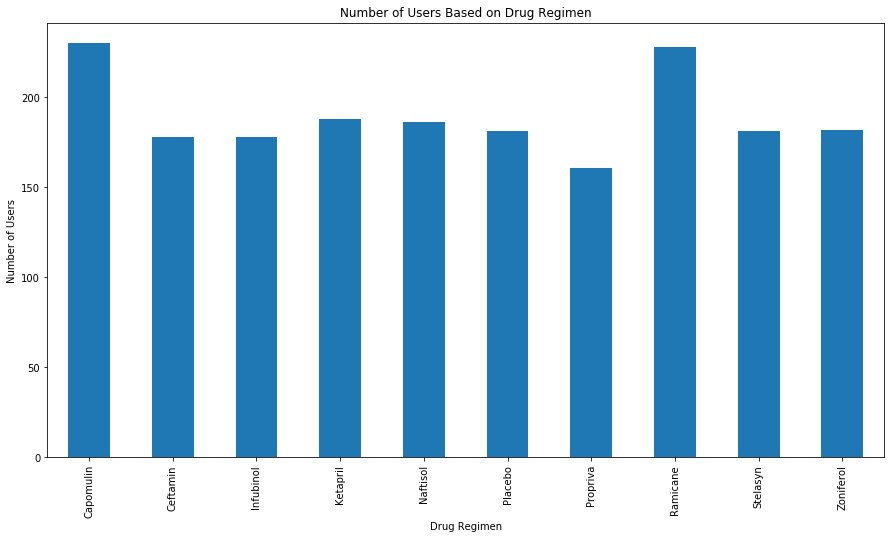

<Figure size 432x288 with 0 Axes>

In [179]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

Data_Points_Pandas = combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

Data_Points_Pandas.plot(kind='bar' , figsize=(15,8))
plt.title("Number of Users Based on Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Users")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Number of Users')

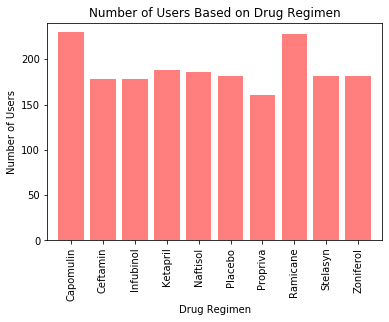

In [180]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

Number_of_Users = [230,178,178,188,186,181,161,228,181,182]
x_axis = np.arange(len(Number_of_Users))

plt.bar(x_axis, Number_of_Users, color='r', alpha=0.5, align="center")

Tick_Locations = [value for value in x_axis]
plt.xticks(Tick_Locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 
                            'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 
                            'Stelasyn', 'Zoniferol'], rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(Number_of_Users)+10)

plt.title("Number of Users Based on Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Users")

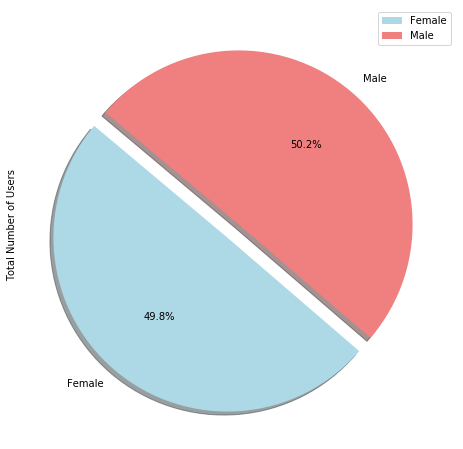

In [181]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_Grouped = combined_df.groupby(["Mouse ID", "Sex"])

Mouse_Gender_df = pd.DataFrame(Gender_Grouped.size())

Mouse_Gender = pd.DataFrame(Mouse_Gender_df.groupby(["Sex"]).count())
Mouse_Gender.columns = ["Total Number of Users"]

Mouse_Gender["Percentage of Sex"] = (100*(Mouse_Gender["Total Number of Users"]/Mouse_Gender["Total Number of Users"].sum()))

Colors = ['lightblue', 'lightcoral']
Explode = (0.1, 0)
plot = Mouse_Gender.plot.pie(y="Total Number of Users",figsize=(12,8), 
                             colors = Colors, startangle=140, explode = Explode, 
                             shadow = True, autopct="%1.1f%%")

(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

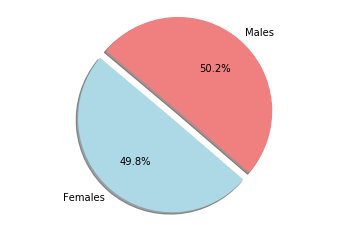

In [182]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Genders = ["Females", "Males"]

Genders_Percentages = [49.799197, 50.200803]

Colors = ["lightblue", "lightcoral"]

Explode = (0.1, 0)

plt.pie(Genders_Percentages, explode=Explode, labels=Genders, colors=Colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

In [183]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

Promising_Regimens = combined_df[combined_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

quartiles = Promising_Regimens['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Promising Regimens Combined:")

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Upper_Lower_Bounds = Promising_Regimens.loc[(Promising_Regimens['Tumor Volume (mm3)'] < lower_bound) | 
                                        (Promising_Regimens['Tumor Volume (mm3)'] > upper_bound)]
Upper_Lower_Bounds

Promising Regimens Combined:
The lower quartile of occupancy is: 40.2201707875
The upper quartile of occupancy is: 50.356470630000004
The interquartile range of occupancy is: 10.136299842500001
The the median of occupancy is: 45.0 
Values below 25.01572102375 could be outliers.
Values above 65.56092039375001 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
463,a203,Infubinol,Female,20,23,45,67.973419,2
540,a685,Infubinol,Male,8,30,45,66.083066,3
635,c139,Infubinol,Male,11,28,35,67.821420,1
636,c139,Infubinol,Male,11,28,40,69.428141,2
637,c139,Infubinol,Male,11,28,45,72.226731,2
949,i386,Infubinol,Female,23,29,40,67.289621,4
1032,k210,Ceftamin,Male,15,28,40,66.622836,2


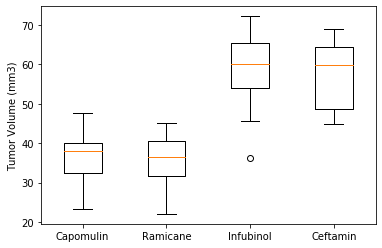

In [184]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Promising_Regimens = combined_df[combined_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
Promising_Regimens = Promising_Regimens.sort_values(["Timepoint"], ascending=True)

Promising_Regimens_data = Promising_Regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

Promising_Regimens_sort = Promising_Regimens.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']

Promising_Regimens_df = Promising_Regimens_sort.to_frame()

Promising_Regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

Final_df = Promising_Regimens_df.reset_index()
Tumor_Lists = Final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
Tumor_Lists_df = pd.DataFrame(Tumor_Lists)
Tumor_Lists_df =Tumor_Lists_df.reindex(Promising_Regimens)
Tumor_Volumes = [vol for vol in Tumor_Lists_df['Tumor Volume (mm3)']]
plt.boxplot(Tumor_Volumes, labels=Promising_Regimens)
plt.ylabel('Tumor Volume (mm3)')
plt.show()


In [185]:
Tumor_Lists_df['Tumor Volume (mm3)']

Drug Regimen
Capomulin    [38.98287774, 38.93963263, 30.48598484, 37.074...
Ramicane     [38.407618299999996, 43.04754260000001, 38.810...
Infubinol    [67.97341878, 65.52574285, 57.03186187, 66.083...
Ceftamin     [62.99935619, 45.0, 56.05774909, 55.74282869, ...
Name: Tumor Volume (mm3), dtype: object

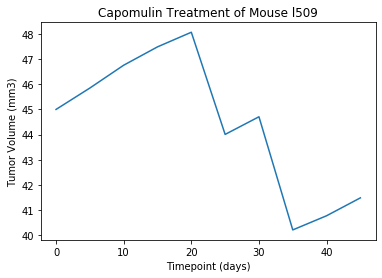

In [186]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Mouse_Treated_With_Capomulin_df = combined_df[combined_df["Mouse ID"]=="l509"]
Mouse_Treated_With_Capomulin_df

x_axis = Mouse_Treated_With_Capomulin_df["Timepoint"]
y_axis = Mouse_Treated_With_Capomulin_df["Tumor Volume (mm3)"]

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

plt.plot(x_axis, y_axis)

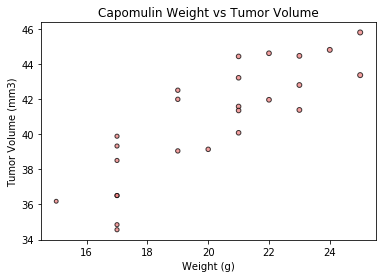

In [187]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_df = combined_df[combined_df["Drug Regimen"]=="Capomulin"]

Average_Tumor_Volume = Capomulin_df.groupby(["Mouse ID"]).mean()

x_axis = Average_Tumor_Volume["Weight (g)"]
y_axis = Average_Tumor_Volume["Tumor Volume (mm3)"]

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Weight vs Tumor Volume")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightcoral", edgecolors="black",
            s=x_axis, alpha=0.75)

The correlation coefficient between mouse weight and average tumor volume for the Capomulin 0.84


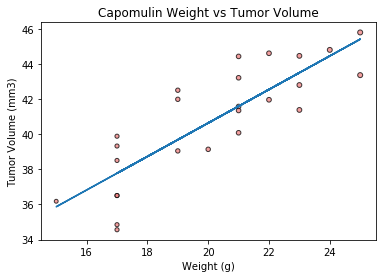

In [188]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin {round(st.pearsonr(x_axis,y_axis)[0],2)}")

Capomulin_df = combined_df[combined_df["Drug Regimen"]=="Capomulin"]

Average_Tumor_Volume = Capomulin_df.groupby(["Mouse ID"]).mean()

x_axis = Average_Tumor_Volume["Weight (g)"]
y_axis = Average_Tumor_Volume["Tumor Volume (mm3)"]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_axis, y_axis)
vc_fit = vc_slope * x_axis + vc_int

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightcoral", edgecolors="black",
            s=x_axis, alpha=0.75 )

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Weight vs Tumor Volume")
plt.plot(x_axis,vc_fit)
